<a href="https://colab.research.google.com/github/kelixirr/AI-Projects/blob/main/Deep%20Learning%20Projects/Autoencoders/Denoising_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [18]:
# corrupt mnist images
mean = 0.5
sigma = 0.5

noise = np.random.normal(loc = mean, scale = sigma, size = x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc = mean, scale = sigma, size = x_test.shape)
x_test_noisy = x_test + noise

In [21]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [22]:
input_shape = (image_size, image_size, 1)
batch_size = 32

In [29]:
# encoder model

inputs = keras.layers.Input(shape = input_shape, name = "encoder_input")
x = inputs

x = keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)

shape = keras.backend.int_shape(x) # shape for decoder

x = keras.layers.Flatten()(x)
latent = keras.layers.Dense(16, name = 'latent_vector')(x)

encoder = keras.models.Model(inputs, latent, name = "encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 latent_vector (Dense)       (None, 16)                50192     
                                                                 
Total params: 69008 (269.56 KB)
Trainable params: 69008 (269.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# decoder model
latent_inputs = keras.layers.Input(shape = (16,), name = "decoder_input")
x = keras.layers.Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = keras.layers.Reshape((shape[1], shape[2], shape[3]))(x)

x = keras.layers.Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
x = keras.layers.Conv2DTranspose(filters = 32, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)

outputs = keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, padding = "same", activation = 'sigmoid', name = "decoder")(x)

decoder = keras.models.Model(latent_inputs, outputs, name = 'decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
 dense_4 (Dense)             (None, 3136)              53312     
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 14, 14, 64)        36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 28, 28, 32)        18464     
 Transpose)                                                      
                                                                 
 decoder (Conv2DTranspose)   (None, 28, 28, 1)         289 

In [37]:
# autoencoder
autoencoder = keras.models.Model(inputs, decoder(encoder(inputs)), name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                69008     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         108993    
                                                                 
Total params: 178001 (695.32 KB)
Trainable params: 178001 (695.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
autoencoder.compile(loss = "mse", optimizer = 'adam')
autoencoder.fit(x_train_noisy, x_train, validation_data = (x_test_noisy, x_test), epochs = 10, batch_size = batch_size)

Epoch 1/10
1875/1875 [==============================] - 127s 67ms/step - loss: 0.0354 - val_loss: 0.0198
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0189 - val_loss: 0.0178
Epoch 3/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0175 - val_loss: 0.0170
Epoch 4/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 5/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0162 - val_loss: 0.0165
Epoch 6/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0158 - val_loss: 0.0164
Epoch 7/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0155 - val_loss: 0.0158
Epoch 8/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 9/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 10/10
1875/1875 [==============================] 

In [41]:
x_decoded = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 7s 21ms/step


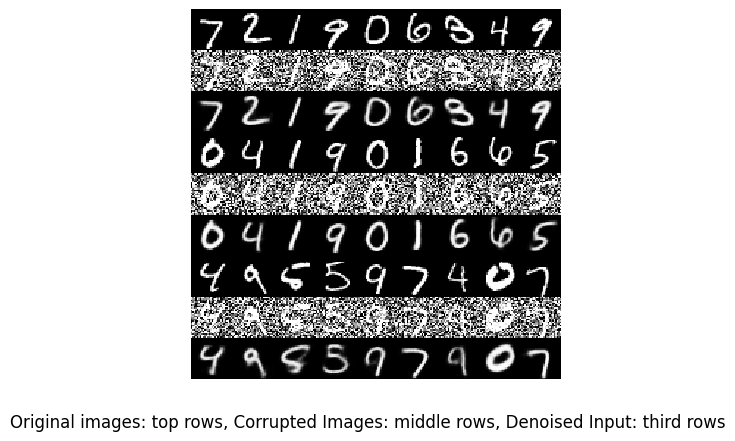

In [48]:
rows, cols = 3, 9
num = rows * cols

imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis = 1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis("off")
plt.figtext(0.5, 0.01, "Original images: top rows, Corrupted Images: middle rows, Denoised Input: third rows", ha="center", fontsize=12)
plt.imshow(imgs, interpolation = "none", cmap = "gray")
plt.show()